In [1]:
import numpy as np
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

import time
import datetime

import json
import os
from dotenv import load_dotenv #pip install python-dotenv

from bs4 import BeautifulSoup
import requests 

from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings("ignore")

from my_functions import *

In [2]:
df_masters_id0_scrapped = pd.read_csv('Datasets/df_masters_id0.csv')
df_masters_id0_scrapped.shape

(2770, 13)

<Axes: xlabel='count', ylabel='year'>

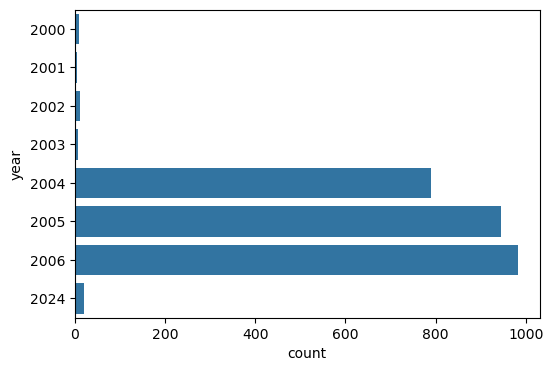

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_masters_id0_scrapped, y='year')

**TO GET FROM 2016**

### **``master_id = 0``**

In [23]:
url = "https://api.discogs.com/database/search"
headers = {"User-Agent": "MyDiscogsApp/1.0", "Authorization": "Discogs token=UwfqmsztxwnfABgQpmhaAsprbUgpOJKGOJSQAqfp"}

# Define parameters for artist search
params = {
    "per_page": 100    # Number of results per page (max 100)
    , "page": 1 
    , 'type': 'release'
    , 'format': 'album'
    , 'sort': 'title'
    , 'sort_order': 'asc'
    , 'master_id': 0

    # items to change
    , 'genre': 'Rock'
    , 'country': "UK"
    , 'year': 2006
}

response = requests.get(url, headers=headers, params=params)
data = response.json()

data['pagination']['items']

1237

In [21]:
3100*5/3600

4.305555555555555

**SUPER CODI**

In [ ]:
url_search = "https://api.discogs.com/database/search"
headers = {"User-Agent": "MyDiscogsApp", "Authorization": "Discogs token=UwfqmsztxwnfABgQpmhaAsprbUgpOJKGOJSQAqfp"}

df_masters_scrapped = pd.read_csv('Datasets/df_masters.csv')

# rock_styles = ["Pop Rock", "Punk", "Alternative Rock", "Indie Rock", "Hardcore", "Rock & Roll", "Hard Rock", "Psychedelic Rock"
#               , "Black Metal", "Heavy Metal", "Folk Rock", "Experimental", "Prog Rock", "Death Metal", "Garage Rock"]

# create empty lists
artist_id_list = []
artists_list = []
titles_list = []
years_list = []
release_countries_list = []
album_length_list = []
tracks_list = []
release_type_list = []
genres_list = []
styles_list = []
master_id_new_list = []
artist_profile_list = []
main_release_id_list = []

attempts = 0
scrapped = 0
start_year = 2016

for year in range(start_year, start_year+1):
    print(f'Year: {year}')

    # Define parameters for album search
    params = {
        "type": "release"  # Search for masters
        , "format": "album"           # just search for albums
        , "per_page": 100    # Number of results per page (max 100)
        , "page": 1          # Start with page 1
        , 'country': 'UK'
        , 'master_id': 0
        , "year": year
        , 'genre': 'Rock'
    }

    response1 = requests.get(url_search, headers=headers, params=params)
    time.sleep(1)
    data1 = response1.json()

    items = data1['pagination']['items']
    print(f'Items: {items} releases')

    pages = data1['pagination']['pages']+1
    
    for page in range(1, pages):
        print(f'------------ Page: {page} of {pages-1}, {year} -------------')

        params['page'] = page     # change pages
        response2 = requests.get(url_search, headers=headers, params=params)
        data2 = response2.json()

        for id in range(len(data2['results'])):
            try:
                attempts+=1
                time.sleep(1)

                release_id = data2['results'][id]['id']

                url_release = f"https://api.discogs.com/releases/{release_id}"
                response3 = requests.get(url_release, headers=headers)
                time.sleep(1)
                data3 = response3.json()
                artist = data3['artists'][0]['name']

                if artist == 'Various':
                        print(f'{attempts} attempts - {scrapped} scrapped - {((page-1)*100)+id+1}/{items} - release_id {release_id}: Compilation') 
                        continue   # I don't want compilations
                else:
                # define the data I want to get
                    title = data3['title']
                    release_year = data3['year']                
                    genres = data3['genres']
                    styles = data3['styles']

                # a more complex information is the total duration of the album, I have to sum the durations of each song
                    number_of_songs = len(data3['tracklist'])
                    song_durations = []

                    for song in range(number_of_songs):
                        song_duration = data3['tracklist'][song]['duration']
                        try:
                            minutes = int(song_duration.split(':')[0])
                            seconds = int(song_duration.split(':')[1])
                            song_duration_minutes = minutes + seconds/60
                            song_durations.append(song_duration_minutes)
                        except:
                            pass
                        album_length = round(sum(i for i in song_durations), 2)

                    artist_id = data3['artists'][0]['id']

                # define the data I want to get
                    release_country = data3['country']
                    release_type = data3['formats'][0]['descriptions']

                # artist page
                    url = f"https://api.discogs.com/artists/{artist_id}"
                    time.sleep(1)
                    response5 = requests.get(url, headers=headers)
                    data5 = response5.json()

                # define the data I want to get
                    try:
                        artist_profile = data5['profile']
                    except:
                        artist_profile = np.nan
                        pass

                # save the info in the lists
                    artist_id_list.append(str(artist_id))
                    artists_list.append(artist)
                    titles_list.append(title)
                    years_list.append(release_year)
                    genres_list.append(genres)
                    styles_list.append(styles)
                    master_id_new_list.append(np.nan)
                    album_length_list.append(album_length)
                    tracks_list.append(number_of_songs)
                    release_countries_list.append(release_country)
                    release_type_list.append(release_type)
                    main_release_id_list.append(release_id)

                    if artist_profile == '':
                        artist_profile_list.append(np.nan)
                    else:
                        artist_profile_list.append(artist_profile)

                    scrapped+=1

                # list lengths
                    lists = [artist_id_list, main_release_id_list, master_id_new_list, release_countries_list, artists_list, titles_list, album_length_list
                            , tracks_list, release_type_list, genres_list, styles_list, artist_profile_list, years_list]

                # Check if all lists have the same length
                    lengths = [len(lst) for lst in lists]
                    if len(set(lengths)) != 1:
                        print("Lengths are not the same.")
                        break # stop the loop, I won't be able to store the data if I have one value missing

                    print(f'{attempts} attempts - {scrapped} scrapped - {((page-1)*100)+id+1}/{items} - release_id {release_id}: {artist} - {title}')
                    time.sleep(1)
            except:
                print(f'{attempts} attempts - {scrapped} scrapped - {((page-1)*100)+id+1}/{items} - release_id {release_id}: {artist} - {title} - Album not found')
                continue    # sometimes it crashes for some unknown reason, so I skip this album and continue

Year: 2005
Items: 1116 releases
------------ Page: 1 of 12, 2005 -------------
1 attempts - 1 scrapped - 1/1116 - release_id 872245: Thronar - For Death And Glory
2 attempts - 2 scrapped - 2/1116 - release_id 9948676: Marillion - Theatre Of The Living Arts Philadelphia,PA, USA,8 October 2004
3 attempts - 3 scrapped - 3/1116 - release_id 4425305: Tyla - As It Was How It Is Vol I
4 attempts - 4 scrapped - 4/1116 - release_id 5672505: Sons Of Slaughter - The Extermination Strain
5 attempts - 5 scrapped - 5/1116 - release_id 3777336: Deke Leonard - Freedom And Chains
6 attempts - 6 scrapped - 6/1116 - release_id 2985802: Lower Forty-Eight - Apertures
7 attempts - 7 scrapped - 7/1116 - release_id 6795658: Product (20) - The Fire
8 attempts - 8 scrapped - 8/1116 - release_id 4163016: Martin Stephenson - Wheel Of Fortune
9 attempts - 9 scrapped - 9/1116 - release_id 3163383: Thomas Truax - Audio Addiction
10 attempts - 10 scrapped - 10/1116 - release_id 9716114: Failsafe (5) - What We Are Tod

In [17]:
(65*60)/851

4.582843713278496

#### Continue

In [25]:
df_masters_id0 = pd.DataFrame({'artist_id': artist_id_list
                        , 'master_id': master_id_new_list
                        , 'main_release_id': main_release_id_list
                        , 'release_country': release_countries_list
                        , 'artist': artists_list
                        , 'title': titles_list
                        , 'year': years_list
                        , 'album_length': album_length_list
                        , 'tracks': tracks_list
                        , 'release_type': release_type_list
                        , 'genres': genres_list
                        , 'styles': styles_list
                        , 'artist_profile': artist_profile_list
                        })
df_masters_id0.shape

(2185, 13)

In [26]:
print(f'{df_masters_id0.shape[0]} releases\n{df_masters_id0.artist.nunique()} different artists')

2185 releases
1766 different artists


In [27]:
df_masters_id0

,artist_id,master_id,main_release_id,release_country,artist,title,year,album_length,tracks,release_type,genres,styles,artist_profile
0,315333,NaN,872245,UK,Thronar,For Death And Glory,2005,44.65,9,[Album],[Rock],"[Folk Rock, Viking Metal, Death Metal]",Band started as [a3269858] in 1998 and release...
1,218108,NaN,9948676,UK,Marillion,"Theatre Of The Living Arts Philadelphia,PA, US...",2005,147.53,24,[Album],[Rock],[Prog Rock],"Marillion formed in Aylesbury, Buckinghamshire..."
2,817499,NaN,4425305,UK,Tyla,As It Was How It Is Vol I,2005,0.00,19,[Album],[Rock],[Acoustic],NaN
3,3817906,NaN,5672505,UK,Sons Of Slaughter,The Extermination Strain,2005,33.02,11,[Album],[Rock],[Death Metal],NaN
4,417091,NaN,3777336,UK,Deke Leonard,Freedom And Chains,2005,64.72,16,[Album],[Rock],"[Blues Rock, Acoustic, Rock & Roll]",Deke Leonard was the stage name of [a575470] (...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,1205690,NaN,3026540,"USA, Canada & UK",Emily Zuzik,You Had Me At Goodbye,2006,43.97,11,[Album],"[Electronic, Rock, Pop]","[Alternative Rock, Trip Hop, Downtempo, Vocal,...",NaN
2181,227537,NaN,13127902,UK & Europe,Curtis Schwartz,The Vibe,2006,0.00,71,[Album],"[Electronic, Hip Hop, Rock, Funk / Soul, Pop, ...","[Hard Rock, Instrumental, Stoner Rock]","Curtis Schwartz is an American composer, produ..."
2182,4467014,NaN,10492288,UK & Europe,Evon Brennan,.... An Extract From Small Mercies,2006,0.00,3,"[Album, Sampler]","[Electronic, Rock, Folk, World, & Country]","[Pop Rock, Synth-pop]",NaN
2183,256313,NaN,15297041,UK & Europe,Hank Williams,Your Cheatin' Heart,2006,0.00,40,"[Album, Compilation, Stereo]","[Rock, Blues, Folk, World, & Country]","[Country, Honky Tonk, Country Rock, Country Bl...",Legendary American country singer and songwrit...


### **Exporting to csv**

In [37]:
df_masters_id0_scrapped = pd.read_csv('Datasets/df_masters_id0.csv')
df_masters_id0_scrapped.shape

(2770, 14)

In [31]:
df_masters_id0_concat = pd.concat([df_masters_id0_scrapped, df_masters_id0])
df_masters_id0_concat.reset_index(drop=True, inplace=True)
df_masters_id0_concat.shape

(3028, 14)

In [34]:
df_masters_id0_concat.year.value_counts()

year
2006    982
2005    945
2004    790
2024     21
2002     12
2000      9
2003      7
2001      4
Name: count, dtype: int64

In [33]:
check_duplicates_albums(df_masters_id0_concat)

Found 258 duplicates
Resulting dataset: (2770, 14)


In [50]:
df_masters_id0_concat.head()

,artist,title,artist_id,master_id,main_release_id,release_country,year,album_length,tracks,release_type,genres,styles,artist_profile
0,Blasfeme,Black Legion,8287884,0,32987169,UK,2024,32.33,7,"['Album', 'Limited Edition']",['Rock'],['Black Metal'],"Blasfeme is a two piece black metal force, fue..."
1,Dawnwalker,The Unknowing,7622357,0,32331393,UK,2024,0.00,9,"['LP', 'Album']",['Rock'],['Prog Rock'],"Post-Metal/Rock band from London, UK."
2,Trash Boat,Heaven Can Wait,3896679,0,32921493,UK,2024,36.03,11,"['12""', '33 ⅓ RPM', 'Album', 'Stereo']",['Rock'],['Hardcore'],NaN
3,Caelestra,Bastion,8367186,0,32682639,UK,2024,48.65,6,['Album'],['Rock'],"['Progressive Metal', 'Post-Metal', 'Black Met...","Caelestra. Bristol, UK. The creation of Fever ..."
4,Other Half,Dark Ageism,4456943,0,31040566,UK,2024,0.00,12,"['LP', 'Album', 'Limited Edition']",['Rock'],"['Post-Hardcore', 'Punk']",NaN


In [66]:
df_masters_id0_concat.to_csv('Datasets/df_masters_id0.csv', index=False)